In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/AgencyDataset/AgencyDataset.xlsx


Creating features for PCA & outliers

In [2]:
def outlier_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower = q1-(iqr*2)
    upper = q3+(iqr*2)
    return np.where((data>upper)|(data<lower))

In [3]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [4]:
import pandas as pd

Price Detection & Prediction: Main goal.

Checking links & Correlation with price & other labels.

<b>1)Date Study 
Check Date Range & Link to price range.
if Date range = 3 Months, (May-July) 
    Check Price Variation.</b>
    

    
    
2)Bedroom study, 
    Checking Number of bedrooms & link to price range 
    Integer Value
    
3) Bathroom study:
    
Lower Level Baths? A. 3/4

Main Floor Baths? A. 1/2

Upper Floor Baths? A. 1 full and 1 3/4, Feature Engineering!!
    
 
    
4) Living Room Study:
       Describes Living room space in sqft.
        
    

5) Lot Value Study:
       Describes Full space of the house/appartment.
        
    
    
 6) Floor value Study:
        Number of floors, Real value
    
    if 1.5 : Second floor = 1/2 First floor.
       
    
    
  7) View: Descriptional Data:  Integer values
« 0 » : bad
« 1 » : mediocre
« 2 » : good enough
« 3 » : good
« 4 » : very good 
    
   8)Condition: 
    
                
    « 1 » : mauvaise 
                  « 2 » : assez mauvaise
                  « 3 » :  passable 
                  « 4 » :  bonne 
                  « 5 » : très bonne

In [5]:
data = pd.read_excel("../input/AgencyDataset/AgencyDataset.xlsx")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


1) Bedrooms [0-9]



2) Bathrooms [0-8]



3) sqft_living [370-13540]sqft 


4) sqft_lot [6.380000e+02 - 1.074218e+06] sqft



5) floors [1-3.5] 


6) View [0-4]


7) Condition [0-7] 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Dropping Street & Country collumns

In [9]:
data["country"].nunique()

1

In [10]:
data = data.drop(["street","country"], axis=1)


In [11]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [12]:
def TwoFeatureGraph(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', color='g', label='training data')
    plt.legend()

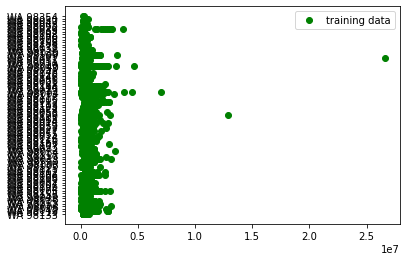

In [13]:
import matplotlib.pyplot as plt # for graphs 
X = data["price"]
y = data["statezip"]
TwoFeatureGraph(X,y)

Separating statezip into numerical & categorical values to check state occurances

In [14]:
df = pd.DataFrame({'statezip': data["statezip"]})


In [15]:
df[['state','number']] = df.statezip.str.split(" ",expand=True,)
df['state'].nunique()

1

Only "WA" seems to be the reaccuring value in the statezip collumn so we're dropping the WA from the data

In [16]:
data[['state','statenb']] = data['statezip'].str.split(" ",expand=True,)


In [17]:
data


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,state,statenb
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,WA,98133
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,WA,98119
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,WA,98042
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,WA,98008
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,WA,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,WA,98133
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,WA,98007
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,WA,98059
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,WA,98178


In [18]:
data = data.drop(["statezip","state"], axis=1)


In [19]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statenb
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,98133
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,98119
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,98042
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,98008
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,98133
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,98007
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,98059
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,98178


In [20]:
data["city"].nunique()

44

On to the city collumn, encoding is the way to go.
Using one hot encoder & testing out the resulting data

In [21]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df1 = pd.DataFrame({'city': data["city"]})
# Encode labels in column 'species'.
df1['city']= label_encoder.fit_transform(df1['city'])

df1


,city
0,36
1,35
2,18
3,3
4,31
...,...
4595,35
4596,3
4597,32
4598,35


In [22]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
data["cityEnc"] = LB.fit_transform(data["city"])

data = data.drop(["city"],axis=1)
data["cityEnc"]

0       36
1       35
2       18
3        3
4       31
        ..
4595    35
4596     3
4597    32
4598    35
4599     9
Name: cityEnc, Length: 4600, dtype: int64

Let's take a look at our data after encoding.

In [23]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statenb,cityEnc
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133,36
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119,35
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042,18
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008,3
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,98133,35
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,98007,3
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,98059,32
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,98178,35


Let's take a look & see if any outliers exist in our data

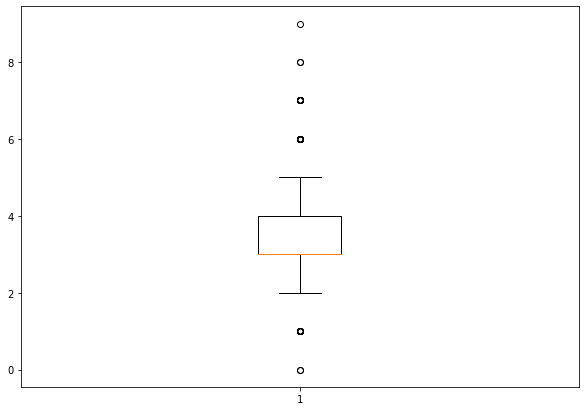

In [24]:
import matplotlib.pyplot as plt
import numpy as np
 
 

 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data["bedrooms"])
 
# show plot
plt.show()

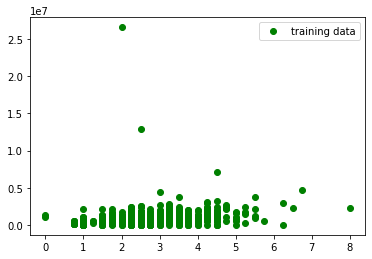

In [25]:
import matplotlib.pyplot as plt # for graphs 
X = data["bathrooms"]
y = data["price"]
TwoFeatureGraph(X,y)

From describing the data, max values seems coherent so no outliers.

In [26]:
#Dropping date value since no correlation with price or anything else
data = data.drop(["date"], axis=1)


In [27]:
outlier_iqr(data["bedrooms"])


(array([ 122,  241,  252,  291,  575,  743, 1455, 1479, 1500, 1644, 2365,
        2717, 2917, 3004, 3046, 3209, 3370, 3911, 4243]),)

In [28]:
data.keys()
print(data.shape) 
#nombre d'observations/lignes
n = data.shape[0]
#nombre de variables/colonnes
p = data.shape[1]

(4600, 15)


In [29]:
from sklearn.preprocessing import StandardScaler
#instanciation de l'objet
sc = StandardScaler()
#transformation – centrage-réduction
data_sc = sc.fit_transform(data)
print(data_sc)


[[-0.42386353 -0.44112227 -0.84320364 ...  1.22167046  1.00910662
   0.8618055 ]
 [ 3.2495981   1.75970468  0.43280154 ... -0.82569345  0.74563338
   0.77834292]
 [-0.37242442 -0.44112227 -0.20520105 ... -0.82569345 -0.70346948
  -0.64052081]
 ...
 [-0.23956224 -0.44112227  0.43280154 ... -0.82569345 -0.38353768
   0.5279552 ]
 [-0.61826787  0.6592912  -0.20520105 ... -0.82569345  1.85598491
   0.77834292]
 [-0.58775916 -0.44112227  0.43280154 ... -0.82569345 -0.70346948
  -1.39168397]]


In [30]:
data_sc

array([[-0.42386353, -0.44112227, -0.84320364, ...,  1.22167046,
         1.00910662,  0.8618055 ],
       [ 3.2495981 ,  1.75970468,  0.43280154, ..., -0.82569345,
         0.74563338,  0.77834292],
       [-0.37242442, -0.44112227, -0.20520105, ..., -0.82569345,
        -0.70346948, -0.64052081],
       ...,
       [-0.23956224, -0.44112227,  0.43280154, ..., -0.82569345,
        -0.38353768,  0.5279552 ],
       [-0.61826787,  0.6592912 , -0.20520105, ..., -0.82569345,
         1.85598491,  0.77834292],
       [-0.58775916, -0.44112227,  0.43280154, ..., -0.82569345,
        -0.70346948, -1.39168397]])

Moving on to clustering our data to check for patterns.
To get the primary values, we're gonna run some PCA

In [31]:
print(np.std(data_sc,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
from sklearn.decomposition import PCA

acp = PCA(svd_solver='full')

print(acp)


PCA(svd_solver='full')


In [33]:
coord = acp.fit_transform(data_sc)

print(acp.n_components_) 
print(acp.explained_variance_ratio_)

eigval = (n-1)/n*acp.explained_variance_
print(eigval)

15
[2.70252792e-01 1.42751742e-01 1.05299324e-01 7.99720874e-02
 7.57712491e-02 6.55296544e-02 5.56187491e-02 4.62706617e-02
 4.00572718e-02 2.92286647e-02 2.68166766e-02 2.47256339e-02
 2.27517897e-02 1.49537039e-02 2.76497368e-33]
[4.05379189e+00 2.14127613e+00 1.57948985e+00 1.19958131e+00
 1.13656874e+00 9.82944815e-01 8.34281236e-01 6.94059926e-01
 6.00859077e-01 4.38429971e-01 4.02250148e-01 3.70884509e-01
 3.41276845e-01 2.24305559e-01 4.14746052e-32]


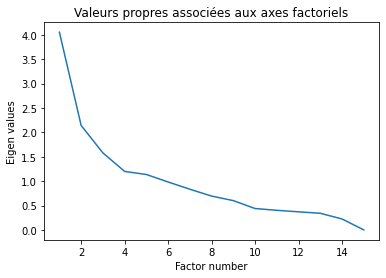

In [34]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Valeurs propres associées aux axes factoriels")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

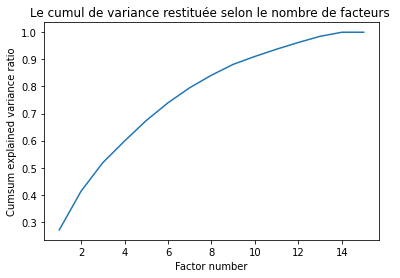

In [35]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Le cumul de variance restituée selon le nombre de facteurs ")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


We're gonna check the number of columns we're gonna keep 